In [1]:
import sys
sys.path.append("..")
from ocr_ensemble.data import load_dataset_1K
from matplotlib import pyplot as plt
import easyocr
import random
from tqdm import tqdm
import numpy as np

import time

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from paddleocr import PaddleOCR
from lavis.models import load_model_and_preprocess

import numpy
import torch
from PIL import Image

In [2]:
dataset = load_dataset_1K()
paddleocr_model = PaddleOCR(use_angle_cls=True, lang='en')

[2023/04/17 14:43:27] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/media/ntu/volume1/home/s121md302_06/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/media/ntu/volume1/home/s121md302_06/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgne

In [3]:
ocrs = []
labels = []
for idx, el in enumerate(tqdm(dataset)):
    img, txt, key = el
    if type(img) is Image.Image:
        raw_img = numpy.asarray(img)
    else:
        raw_img = img
    # ocr = reader.readtext((255*img).astype(np.uint8)) # easyocr likes uint8 format
    # increase image contrast
    # processed_img = raw_img[:, :, ::-1]
    processed_img = (raw_img * 255).astype(np.uint8) # from float32 to uint8

    
    ocr = paddleocr_model.ocr(processed_img, cls=True)
    print('ocr', ocr)
    ocrs += [ocr]
    labels += [len(ocr) > 0]
    
    
    # # randomly display images
    # if random.random() < 0.1:
    if random.random() < 1:
        print(f'contains text {labels[-1]}')
        print(ocr)
        plt.imshow(img)
        plt.show()
    
    print('='*80)
    
    if idx > 20:
        break


0it [00:00, ?it/s]

[2023/04/17 14:43:34] ppocr DEBUG: dt_boxes num : 6, elapse : 1.3214313983917236


0it [00:01, ?it/s]


OSError: (External) CUBLAS error(15). 
  [Hint: Please search for the error code(15) on website (https://docs.nvidia.com/cuda/cublas/index.html#cublasstatus_t) to get Nvidia's official solution and advice about CUBLAS Error.] (at /paddle/paddle/phi/kernels/funcs/blas/blas_impl.cu.h:35)
  [operator < fc > error]

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img[123]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

In [ ]:
img.dtype

dtype('float32')

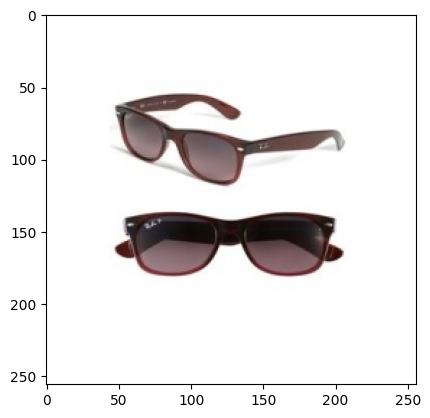

In [ ]:
plt.imshow(img)